# 1. Cities in Sweden - create dataset (*)
Create this DataFrame from scratch:

| |Kommun	| Population|
|----|----  | ----|
|0	| Malmö	| 347949|
|1	| Stockholm | 975551|
|2	| Uppsala | 233839|
|3	| Göteborg | 583056|

  a) Use your DataFrame to print out all the cities. (*)

  b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

  c) Sort the cities by population from largest to smallest. (*)

  d) Filter out the three largest cities. (*)

  e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city.



In [5]:
import pandas as pd

data = dict(Kommun = ["Malmö", "Stockholm", "Uppsala", "Göteborg"], Population = [347949, 975551, 233839, 583056])
df = pd.DataFrame(data, columns=("Kommun", "Population"))
df



,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [6]:
# a)

df["Kommun"]

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

In [7]:
# b)

df[df["Kommun"] == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


In [8]:
sorted_table = df.sort_values(by = "Population", ascending=False)
sorted_table

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [9]:
largest_3 = df.sort_values(by = "Population", ascending=False).head(3)
largest_3

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [10]:
df2 = pd.DataFrame(dict(Population_percentage = [(347949/10379295)*100, (975551/10379295)*100, (233839/10379295)*100, (583056/10379295)*100]))
print(pd.concat([df,df2], axis=1))

# or we can use df2.insert(df2.shape[1], "Population_%", (Population/10379295)*100)


      Kommun  Population  Population_percentage
0      Malmö      347949               3.352338
1  Stockholm      975551               9.399010
2    Uppsala      233839               2.252937
3   Göteborg      583056               5.617491


# 2. Cities in Sweden - real dataset (*)
Go into this page, scroll down and download the Excel file containing Swedish population dataset from SCB.

  a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

df.head()
df.info()
df.describe()
Feel free to do more explorations. (*)

  b) Clean your data so that the head looks like this: (*)

  c) Sort the cities by population from largest to smallest. (*)

  d) Filter out the five smallest cities. (*)

  e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

  f) Plot a bar chart for the five largest cities and the five smallest cities. (*)

In [11]:
# a)
import pandas as pd

df = pd.read_excel("komtopp50_2020.xlsx")
df
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54 non-null     object 
 1   Unnamed: 1  51 non-null     float64
 2   Unnamed: 2  51 non-null     object 
 3   Unnamed: 3  52 non-null     object 
 4   Unnamed: 4  51 non-null     float64
 5   Unnamed: 5  51 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.8+ KB


,Unnamed: 1,Unnamed: 4
count,51.000000,51.000000
mean,64.588235,121353.627451
std,279.518599,149002.409627
min,1.000000,2019.000000
25%,13.500000,61154.000000
50%,26.000000,84395.000000
75%,38.500000,113013.500000
max,2019.000000,974073.000000


In [12]:
# b)

df_1 = df.drop([0,1,2,3,4,5]) # the first 6 rows which have empty values are removed

df_2 = df_1.rename(columns={"Unnamed: 0": "Rang 2020", "Unnamed: 1": "Rang 2019", "Unnamed: 2": "Kommun", "Unnamed: 3": "Folkmängd 2020", "Unnamed: 4": "Folkmängd 2019", "Unnamed: 5": "Förändring"}, index={1:50})

df_2["Rang 2019"] = df_2["Rang 2019"].astype(int)
df_2["Folkmängd 2019"] = df_2["Folkmängd 2019"].astype(int)

df_new = df_2.reset_index(drop=True)
df_new.head()



,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,1478
1,2,2,Göteborg,583056,579281,3775
2,3,3,Malmö,347949,344166,3783
3,4,4,Uppsala,233839,230767,3072
4,5,5,Linköping,164616,163051,1565


In [13]:
# c)

largest = df_new.sort_values(by = "Folkmängd 2020", ascending=False)
largest


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,1478
1,2,2,Göteborg,583056,579281,3775
2,3,3,Malmö,347949,344166,3783
3,4,4,Uppsala,233839,230767,3072
4,5,5,Linköping,164616,163051,1565
5,6,6,Örebro,156381,155696,685
6,7,7,Västerås,155551,154049,1502
7,8,8,Helsingborg,149280,147734,1546
8,9,9,Norrköping,143478,143171,307
9,10,10,Jönköping,142427,141081,1346


In [14]:
# d)
smallest_5 = df_new.sort_values(by = "Folkmängd 2020", ascending=True).head()
smallest_5

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
49,50,50,Tyresö,48678,48333,345
48,49,49,Sigtuna,49537,48964,573
47,48,48,Hässleholm,52010,52145,-135
46,47,46,Borlänge,52394,52590,-196
45,46,47,Sundbyberg,52801,52414,387


In [15]:
# e)

total_2020 = df_new["Folkmängd 2020"].sum()
print(total_2020)
total_2019 = df_new["Folkmängd 2019"].sum()
print(total_2019)

6227447
6187016


<AxesSubplot:xlabel='Kommun', ylabel='Folkmängd 2020'>

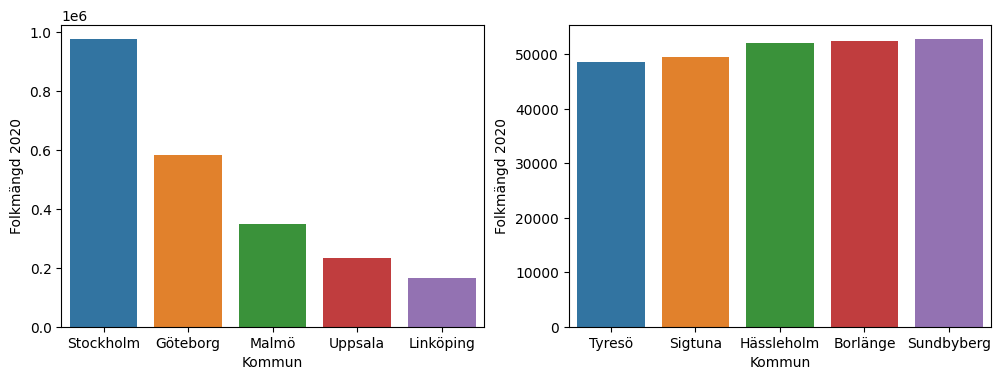

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

smallest_5 = df_new.sort_values(by = "Folkmängd 2020", ascending=True).head()
smallest_5

largest_5 = df_new.sort_values(by = "Folkmängd 2020", ascending=False).head()
largest_5

fig, ax = plt.subplots(1,2, dpi=100, figsize=(12,4))
sns.barplot(data=largest_5, x="Kommun", y="Folkmängd 2020", ax = ax[0])
sns.barplot(data=smallest_5, x="Kommun", y="Folkmängd 2020", ax = ax[1])

# 3. Cities in Sweden - gender (*)
We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

In [17]:
# a) Clean your data so that the head looks like this

df_woman = pd.read_excel("komtopp50_2020.xlsx", sheet_name=2)
# df_woman.head(10)

df_1 = df_woman.drop([0,1,2,3,4,5])

df_2 = df_1.rename(columns={"Unnamed: 0": "Rang 2020", "Unnamed: 1": "Rang 2019", "Unnamed: 2": "Kommun", "Unnamed: 3": "Folkmängd 2020", "Unnamed: 4": "Folkmängd 2019", "Unnamed: 5": "Förändring"})

df_2["Rang 2019"] = df_2["Rang 2019"].astype(int)
df_2["Folkmängd 2019"] = df_2["Folkmängd 2019"].astype(int)

df_woman = df_2.reset_index(drop=True)
# df_woman.head()

df_woman.insert(df_woman.shape[1], "Kön", "Kvinna") # shape[0] = rows, shape[1] = columns
df_woman.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348,1.720094,Kvinna
1,64,64,Alingsås,20900,20774,0.606527,Kvinna
2,123,123,Alvesta,9857,9795,0.632976,Kvinna
3,255,255,Aneby,3318,3350,-0.955224,Kvinna
4,165,164,Arboga,6945,6973,-0.401549,Kvinna


In [18]:

df_man = pd.read_excel("komtopp50_2020.xlsx", sheet_name=3)
# df_man.head(10)

df_1 = df_man.drop([0,1,2,3,4,5])

df_2 = df_1.rename(columns={"Unnamed: 0": "Rang 2020", "Unnamed: 1": "Rang 2019", "Unnamed: 2": "Kommun", "Unnamed: 3": "Folkmängd 2020", "Unnamed: 4": "Folkmängd 2019", "Unnamed: 5": "Förändring"})

df_2["Rang 2019"] = df_2["Rang 2019"].astype(int)
df_2["Folkmängd 2019"] = df_2["Folkmängd 2019"].astype(int)

df_man = df_2.reset_index(drop=True)
# df_man.head()

df_man.insert(df_man.shape[1], "Kön", "Man") 
df_man.head()



,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man


In [19]:
# b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.

total = [df_man, df_woman]
df_totalt = pd.concat(total) # using concat to merge two tables
df_man_and_woman = df_totalt.drop(columns=["Rang 2020", "Rang 2019"])
df_man_and_woman

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,16256,16054,1.258253,Man
1,Alingsås,20702,20646,0.271239,Man
2,Alvesta,10367,10339,0.270819,Man
3,Aneby,3503,3498,0.142939,Man
4,Arboga,7094,7114,-0.281136,Man
...,...,...,...,...,...
285,Österåker,22997,22442,2.473042,Kvinna
286,Östhammar,10846,10803,0.398038,Kvinna
287,Östra Göinge,7270,7262,0.110162,Kvinna
288,Överkalix,1559,1578,-1.204056,Kvinna


In [20]:
#   c) Extract and change column name from the total DataFrame so that the head look like this: (*)


df_totalt = pd.read_excel("komtopp50_2020.xlsx", sheet_name=1)
df_totalt
df_1 = df_totalt.drop([0,1,2,3,4,5])
df_2 = df_1.rename(columns={"Unnamed: 0": "Rang 2020", "Unnamed: 1": "Rang 2019", "Unnamed: 2": "Kommun", "Unnamed: 3": "Total Pop 2020", "Unnamed: 4": "Total Pop 2019", "Unnamed: 5": "Total förändring"})

# df_2["Rang 2019"] = df_2["Rang 2019"].astype(int) no need to change
df_2["Total Pop 2019"] = df_2["Total Pop 2019"].astype(int)

df_totalt = df_2.reset_index(drop=True)
df_totalt
df_extract = df_totalt[["Kommun", "Total Pop 2020", "Total Pop 2019", "Total förändring"]]
df_extract.head()


,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.34074


In [21]:
# d) Merge this data with the data in b) so that the head look like this:

df_merged = pd.merge(df_extract, df_man_and_woman) # pd.merge(left dataframe, right dataframe)
df_merged = df_merged[["Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring", "Kön", "Total Pop 2020", "Total Pop 2019", "Total förändring"]] # rename
df_merged = df_merged.sort_values('Total Pop 2020', ascending=False)
df_merged.head()


,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
396,Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734
397,Stockholm,492569,491853,0.145572,Kvinna,975551,974073,0.151734
115,Göteborg,290551,288973,0.546072,Kvinna,583056,579281,0.65167
114,Göteborg,292505,290308,0.756782,Man,583056,579281,0.65167
269,Malmö,175411,173543,1.07639,Kvinna,347949,344166,1.099179


Text(0.5, 1.0, 'smallest_10')

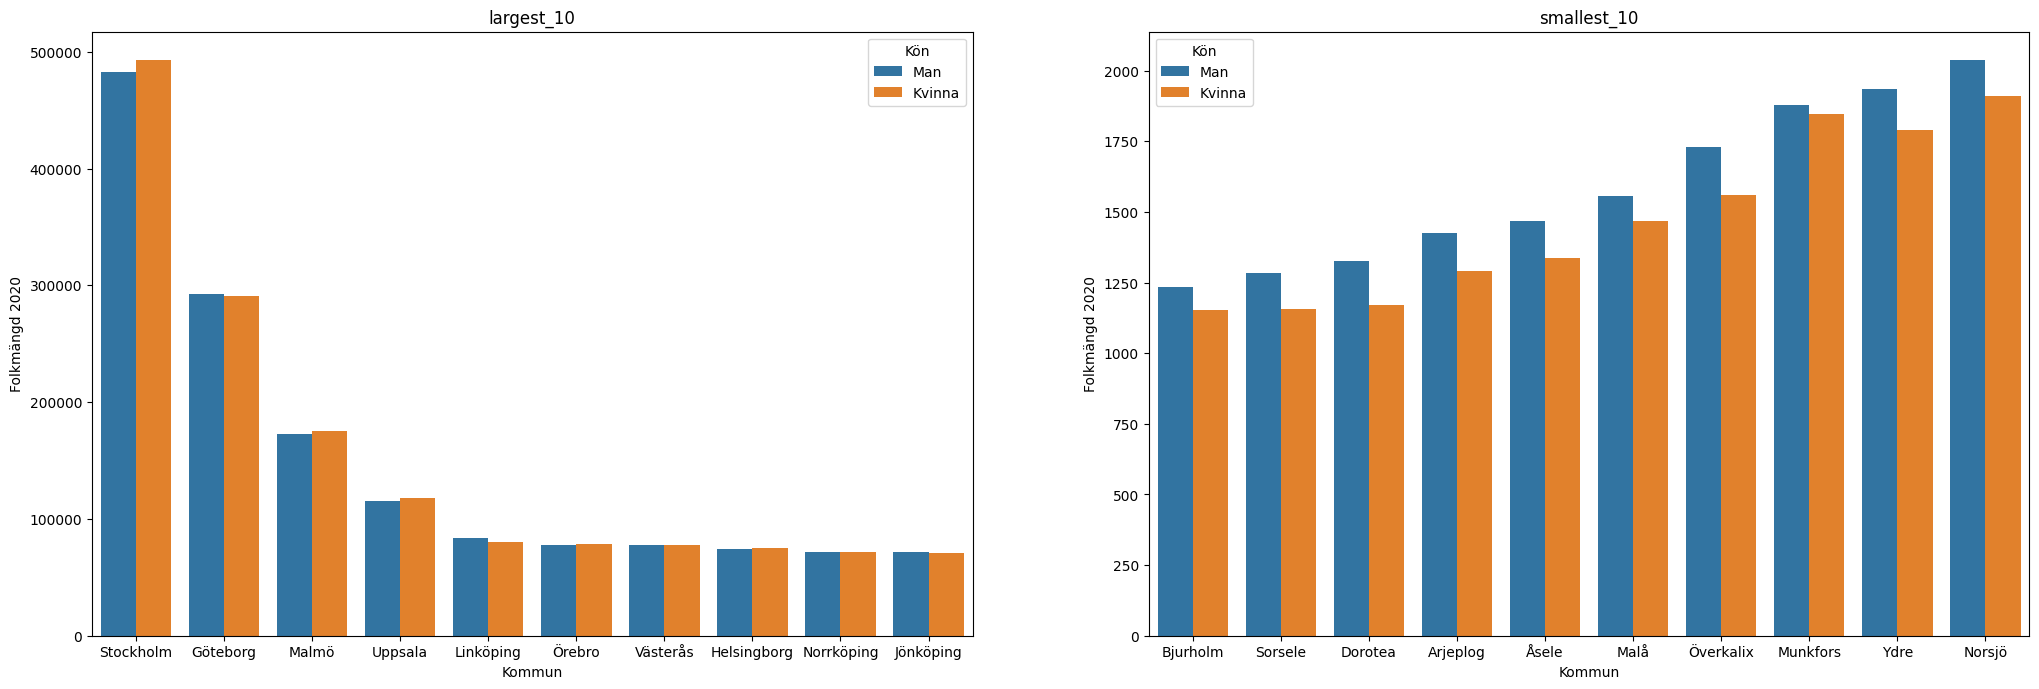

In [22]:
# e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities.

import seaborn as sns
import matplotlib.pyplot as plt

smallest_10 = df_merged.sort_values(by = "Total Pop 2020", ascending=True).head(20)
largest_10 = df_merged.sort_values(by = "Total Pop 2020", ascending=False).head(20)

fig, ax = plt.subplots(1,2, dpi=100, figsize=(25,8))

sns.barplot(data=largest_10, x="Kommun", y="Folkmängd 2020", ax = ax[0], hue="Kön").set_title("largest_10")
sns.barplot(data=smallest_10, x="Kommun", y="Folkmängd 2020", ax = ax[1], hue="Kön").set_title("smallest_10")




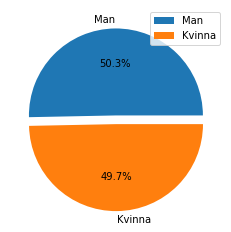

In [23]:
#   f) Create a pie chart showing the total male and female population in Sweden 2020.

#define data
data = [df_man["Folkmängd 2020"].sum(), df_woman["Folkmängd 2020"].sum()]
labels = ["Man", "Kvinna"]


#create pie chart
plt.pie(data, labels = labels, autopct='%1.1f%%', explode=(0,0.1))
plt.legend()
plt.show()

Text(0.5, 1.0, 'largest_5 percentual gender difference in city (%)')

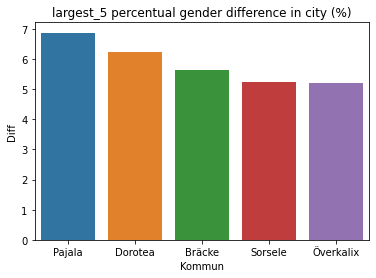

In [24]:
#  g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

# delete the city double values
df_kommun = [df_merged.iloc[2*i+1,0] for i in range(290)]
df_kommun = pd.DataFrame(df_kommun, columns=("Kommun", ))

# calculate the percentual gender difference in city
difference = [((abs(df_merged.iloc[2*i+1,1] - df_merged.iloc[2*i,1]))/df_merged.iloc[2*i,5])*100 for i in range(290)]
df_difference = pd.DataFrame(difference, columns=("Diff", ))

# concat two frames
df_kommun_diff = pd.concat([df_kommun, df_difference], axis=1) 


df_kommun_diff_5 = df_kommun_diff.sort_values("Diff", ascending=False).head(5)


sns.barplot(data=df_kommun_diff_5, x="Kommun", y="Diff").set_title("largest_5 percentual gender difference in city (%)")



Text(0.5, 1.0, 'Top 5 cities with largest populational growth from 2019 to 2020')

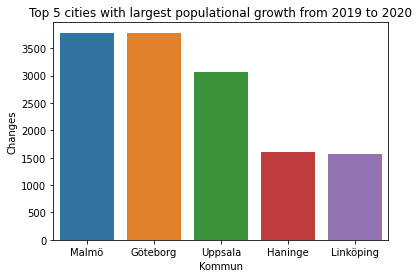

In [71]:
df_change = df_merged["Total Pop 2020"] - df_merged["Total Pop 2019"]
df_change = pd.DataFrame(df_change, columns=("Changes", ))
df_change_added = pd.concat([df_merged, df_change], axis=1) 
df_change_added_top5 = df_change_added.sort_values("Changes", ascending=False).head(10)
sns.barplot(data=df_change_added_top5, x="Kommun", y="Changes").set_title("Top 5 cities with largest populational growth from 2019 to 2020")
